In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation, Conv2D, MaxPooling2D, Conv1D, MaxPooling1D, Embedding, LSTM
from tensorflow.keras.preprocessing.text import text_to_word_sequence, Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow as tf
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.models import load_model
from sklearn.model_selection import StratifiedKFold
import os
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.datasets import mnist, reuters
from keras.utils import np_utils, to_categorical

%matplotlib inline

In [8]:
seed = 0
np.random.seed(seed)
tf.random.set_seed(3)

In [9]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=5000)

In [10]:
x_train = pad_sequences(x_train, maxlen=100)
x_test = pad_sequences(x_test, maxlen=100)

In [13]:
model = Sequential()
model.add(Embedding(5000, 100))
model.add(Dropout(0.5))
model.add(Conv1D(64, 5, padding='valid', activation='relu', strides=1))
model.add(MaxPooling1D(pool_size=4))
model.add(LSTM(55))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 100)         500000    
_________________________________________________________________
dropout (Dropout)            (None, None, 100)         0         
_________________________________________________________________
conv1d (Conv1D)              (None, None, 64)          32064     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, None, 64)          0         
_________________________________________________________________
lstm (LSTM)                  (None, 55)                26400     
_________________________________________________________________
dense (Dense)                (None, 1)                 56        
_________________________________________________________________
activation (Activation)      (None, 1)                 0

Conv1D 

## Data

| 0 | 1 | 2 | 3 |
|:--:|:--:|:--:|:--:|
| 1 | 4 | 3 | 2 |

## Kernal

| 0 | 1 | 2 |
|:--:|:--:|:--:|
| x1 | x0 | x1 |

## Multiply

|-2 | -1 | 0 | 1 | 2 | 3 |
|:--:|:--:|:--:|:--:|:--:|:--:|
| 0 | 0 | 1 | 4 | 3 | 2 |
| x1 | x0 | x1 | | | |

In [14]:
model.compile(loss = 'binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [15]:
history = model.fit(x_train, y_train, batch_size=100, epochs=5, validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/5
25000/25000 [==============================] - 11s 426us/sample - loss: 0.4543 - accuracy: 0.7674 - val_loss: 0.3546 - val_accuracy: 0.8407
Epoch 2/5
25000/25000 [==============================] - 9s 341us/sample - loss: 0.2928 - accuracy: 0.8762 - val_loss: 0.3238 - val_accuracy: 0.8593
Epoch 3/5
25000/25000 [==============================] - 8s 340us/sample - loss: 0.2498 - accuracy: 0.8986 - val_loss: 0.3542 - val_accuracy: 0.8484
Epoch 4/5
25000/25000 [==============================] - 9s 341us/sample - loss: 0.2135 - accuracy: 0.9165 - val_loss: 0.3469 - val_accuracy: 0.8562
Epoch 5/5
25000/25000 [==============================] - 8s 339us/sample - loss: 0.1776 - accuracy: 0.9340 - val_loss: 0.3523 - val_accuracy: 0.8557


In [16]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

In [17]:
x_len = np.arange(len(y_loss))

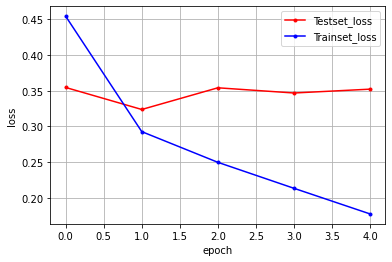

In [18]:
plt.plot(x_len, y_vloss, marker='.', c='red', label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='Trainset_loss')
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()